In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
import pandas as pd

tsla_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_data1.csv')
driv_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/DRIV_data1.csv')
lit_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/LIT_data1.csv')
ndx_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/NDX_data1.csv')
xly_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/XLY_data1.csv')
ndxl_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/NDXL_Normalised_OHLC_VWAP_VOL.csv')
tsla_norm_data = pd.read_csv('/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/Data/TSLA_Normalised_OHLC_VWAP_VOL.csv')

In [32]:
tsla_norm_data.loc[tsla_norm_data['Close_Price'] == 0, 'Close_Price'] = None
tsla_norm_data['Close_Price'] = tsla_norm_data['Close_Price'].ffill()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Close_Price'].pct_change()

tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].replace([np.inf, -np.inf], np.nan)
tsla_norm_data['Daily_Return'] = tsla_norm_data['Daily_Return'].fillna(0)  # Replace NaN with 0

drift = tsla_norm_data['Daily_Return'].mean()

volatility = tsla_norm_data['Daily_Return'].std()

print(f"Drift (Average Return): {drift:.6f}")
print(f"Volatility (Standard Deviation): {volatility:.6f}")

Drift (Average Return): 0.005140
Volatility (Standard Deviation): 0.078022


In [34]:
result_list = []

for drift in [0.001, 0.005, 0.01]:  
    for volatility in [0.02, 0.05, 0.1, 0.2]:  
        price_paths = np.zeros((252, 1000)) 
        price_paths[0] = tsla_norm_data['Close_Price'].iloc[-1]  

        for t in range(1, 252):
            random_shocks = np.random.normal(0, 1, 1000)
            price_paths[t] = price_paths[t - 1] * np.exp(
                (drift - 0.5 * volatility**2) * (1 / 252) + volatility * random_shocks * np.sqrt(1 / 252)
            )

        final_prices = price_paths[-1]
        mean_price = np.mean(final_prices)
        std_dev_price = np.std(final_prices)

        temp_df = pd.DataFrame({
            'Drift': [drift],
            'Volatility': [volatility],
            'Mean_Final_Price': [mean_price],
            'Std_Dev_Final_Price': [std_dev_price]
        })

        temp_df = temp_df.apply(pd.to_numeric, errors='coerce')

        temp_df = temp_df.dropna(axis=1, how='all')

        if not temp_df.empty:
            result_list.append(temp_df)

sensitivity_results = pd.concat(result_list, ignore_index=True)

print(sensitivity_results.head())


   Drift  Volatility  Mean_Final_Price  Std_Dev_Final_Price
0  0.001        0.02          0.907444             0.018054
1  0.001        0.05          0.909588             0.046355
2  0.001        0.10          0.904177             0.089453
3  0.001        0.20          0.911510             0.176191
4  0.005        0.02          0.910479             0.018184


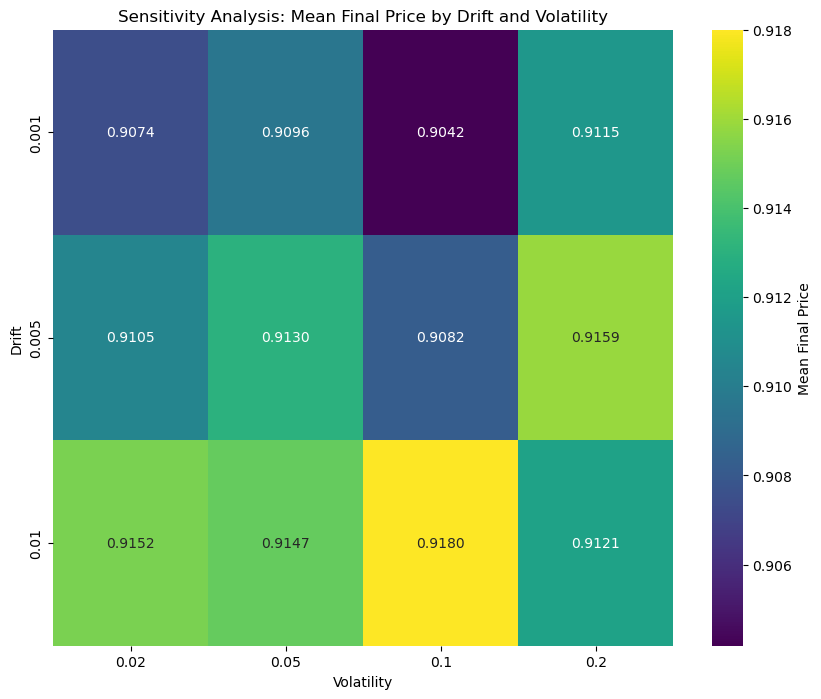

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data_mean = sensitivity_results.pivot(index='Drift', columns='Volatility', values='Mean_Final_Price')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_mean, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Mean Final Price'})
plt.title("Sensitivity Analysis: Mean Final Price by Drift and Volatility")
plt.xlabel("Volatility")
plt.ylabel("Drift")

output_dir = '/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/'
plt.savefig(f'{output_dir}/sensitivity_analysis_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()


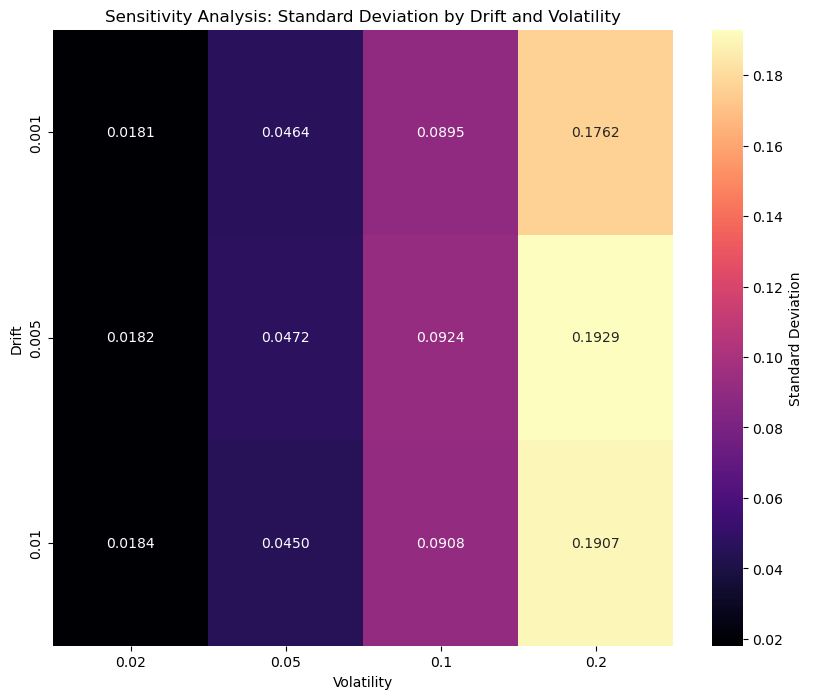

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data_std = sensitivity_results.pivot(index='Drift', columns='Volatility', values='Std_Dev_Final_Price')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_std, annot=True, fmt=".4f", cmap="magma", cbar_kws={'label': 'Standard Deviation'})
plt.title("Sensitivity Analysis: Standard Deviation by Drift and Volatility")
plt.xlabel("Volatility")
plt.ylabel("Drift")

output_dir = '/Users/fatemamahimwala/Documents/TSLA-Quantitative-Research/'
plt.savefig(f'{output_dir}/sensitivity_analysis_std_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()
